Project Plan:
1. Define the Problem to be Addressed

The problem to be addressed involves analyzing and processing credit card transaction data to identify trends, detect anomalies, and derive actionable insights. The dataset includes various features such as transaction amounts, payment systems, merchant details, and geographic information. The goal is to clean the data, identify patterns, and create visualizations that can help in understanding transaction behaviors and potentially detecting fraudulent activities.
2. Explain the Background to the Problem

Credit card fraud is a significant issue affecting financial institutions and consumers globally. With the increasing volume of digital transactions, detecting fraudulent activities has become more challenging and critical. The dataset provided includes transactions that could contain both legitimate and fraudulent records. By cleaning, processing, and analyzing this data, we aim to identify patterns that could lead to the early detection of fraud, thereby reducing financial losses and increasing consumer trust.
3. Explain Potential Benefits of Solving the Problem

    Fraud Detection: By analyzing the transaction data, potential fraudulent activities can be detected, which helps in preventing financial losses for both financial institutions and customers.
    Improved Decision-Making: Insights from the data can help businesses understand customer behavior, leading to better decision-making regarding credit card security and transaction monitoring.
    Enhanced Customer Trust: By ensuring robust fraud detection mechanisms, businesses can enhance customer trust, leading to increased loyalty and reduced customer churn.
    Cost Savings: Early detection of fraud can lead to significant cost savings for financial institutions by reducing chargebacks and other fraud-related expenses.

4. Select and Justify a Specific Approach

The approach involves several steps:

    Data Cleaning and Preprocessing: The dataset will be cleaned to remove any inconsistencies, such as incorrect or missing values, and to standardize the data format (e.g., ensuring ZIP codes are numeric).

    Feature Engineering: New features will be derived from existing data, such as extracting payment systems from credit card numbers and converting categorical variables into numerical ones through techniques like one-hot encoding.

    Exploratory Data Analysis (EDA): EDA will be performed using visualizations to understand the distribution of transaction amounts, detect outliers, and explore correlations between different features.

    Data Aggregation and Filtering: Transactions will be aggregated by different dimensions (e.g., by payment system, by state) to identify patterns and trends.

    Correlation Analysis: A detailed correlation analysis will be conducted to understand the relationships between numerical features, which can provide insights into potential fraud indicators.

    Visualization: Various plots and charts (e.g., bar plots, heatmaps, pair plots) will be used to present the findings clearly and make them actionable.

    Geospatial Analysis: A map visualization will be used to explore the geographic distribution of transactions, which may reveal regional patterns of interest.

This approach is justified because it systematically addresses data quality issues, derives new insights from the data, and uses both statistical and visual analysis techniques to uncover hidden patterns that could indicate fraudulent activity.
5. Plan for the Steps Taken to Address the Problem

    Data Acquisition and Understanding (Day 1-2)
        Load the dataset and perform an initial review of the data.
        Understand the structure, data types, and any immediate issues such as missing values.

    Data Cleaning and Preprocessing (Day 3-4)
        Remove any irrelevant columns, standardize formats, and clean up the data.
        Handle missing values, remove duplicates, and verify the correctness of key fields (e.g., ZIP codes).

    Feature Engineering (Day 5-6)
        Create new features, such as the payment_system derived from credit card numbers.
        Convert categorical variables to numerical ones using techniques like one-hot encoding.

    Exploratory Data Analysis (Day 7-8)
        Perform EDA to understand the distribution of the data and detect any anomalies.
        Use visualizations like histograms, box plots, and pair plots.

    Data Aggregation and Filtering (Day 9-10)
        Aggregate data by various dimensions to identify patterns.
        Filter the data to focus on transactions of interest (e.g., high-value transactions).

    Correlation and Statistical Analysis (Day 11-12)
        Compute and interpret the correlation matrix.
        Conduct statistical tests to further investigate relationships between variables.

    Visualization and Reporting (Day 13-14)
        Create final visualizations to summarize findings.
        Compile a report or presentation that outlines the findings and suggests actionable steps based on the analysis.

    Review and Next Steps (Day 15)
        Review the entire process and identify any areas for improvement or further investigation.
        Plan next steps based on the outcomes of the analysis.


* Download link DB:  https://drive.google.com/file/d/1XzIU2BuV78HQE7_5_L02rKZiUdYmMXw-/view?usp=drive_link or https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset?resource=download&select=credit_card_transactions.csv

In [1]:
import pandas as pd

# Load the credit_card_transactions.csv file into a DataFrame
file_path = '/content/credit_card_transactions.csv'  # Adjust this path if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the column names and their data types
print("\nColumn names and their data types:")
print(df.dtypes)

# Describe the numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Identify and describe categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns and their unique values:")
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

# Manipulate the dataset:
# Convert a categorical column to numerical (example: convert 'Transaction Type' to one-hot encoding)
if 'Transaction Type' in df.columns:
    df = pd.get_dummies(df, columns=['Transaction Type'], drop_first=True)

# Describe the updated data
print("\nUpdated data description after manipulation:")
print(df.describe())

# Additional insights (e.g., total number of transactions,)
total_transactions = len(df)
print(f"\nTotal transactions: {total_transactions}")

# Check for missing values across all columns
missing_values_total = df.isnull().sum().sum()
print(f"\nTotal missing values (NaN, NA, etc.): {missing_values_total}")

# Handle missing values:
# For categorical columns, fill missing values with a placeholder
for column in categorical_columns:
    df[column].fillna('Missing', inplace=True)

# Check for duplicate rows
duplicate_rows_total = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_rows_total}")

# Remove duplicates if necessary
df.drop_duplicates(inplace=True)

# Total number of rows after removing duplicates
total_rows_after_cleanup = len(df)
print(f"\nTotal rows after removing duplicates: {total_rows_after_cleanup}")


First few rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 

In [2]:
import pandas as pd

# Load the credit_card_transactions.csv file into a DataFrame
file_path = '/content/credit_card_transactions.csv'  # Adjust this path if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Remove the 'fraud_' prefix from the 'merchant' column
df['merchant'] = df['merchant'].str.replace(r'^fraud_', '', case=False, regex=True)

# Delete the 'is_fraud' column
if 'is_fraud' in df.columns:
    df.drop(columns=['is_fraud'], inplace=True)
    print("\n'is_fraud' column has been deleted.")

# Ensure 'merch_zipcode' column contains only integers
if 'merch_zipcode' in df.columns:
    # Convert 'merch_zipcode' to numeric, forcing errors to NaN
    df['merch_zipcode'] = pd.to_numeric(df['merch_zipcode'], errors='coerce')

    # Drop rows with NaN in 'merch_zipcode'
    df.dropna(subset=['merch_zipcode'], inplace=True)

    # Convert 'merch_zipcode' to integers
    df['merch_zipcode'] = df['merch_zipcode'].astype(int)

    print("\n'Verified and cleaned 'merch_zipcode' column to ensure it contains only integers.")

# Define a function to check if a credit card number is valid
def is_valid_credit_card_number(cc_num):
    cc_num = str(cc_num)
    if not cc_num.isdigit():
        return False
    length = len(cc_num)
    if length == 15:  # American Express
        return cc_num.startswith(('34', '37'))
    elif length == 16:  # Visa, MasterCard, Discover
        return cc_num.startswith(('4', '51', '52', '53', '54', '55', '6011'))
    return False

# Define a function to determine the payment system based on the card number
def get_payment_system(cc_num):
    cc_num = str(cc_num)
    if cc_num.startswith('4') and len(cc_num) == 16:
        return 'Visa'
    elif cc_num.startswith(('51', '52', '53', '54', '55')) and len(cc_num) == 16:
        return 'MasterCard'
    elif cc_num.startswith(('34', '37')) and len(cc_num) == 15:
        return 'American Express'
    elif cc_num.startswith('6011') and len(cc_num) == 16:
        return 'Discover'
    else:
        return 'Incorrect card number'

# Apply the function to add the 'payment_system' column
if 'cc_num' in df.columns:
    # Convert 'cc_num' to string to avoid issues with leading zeros
    df['cc_num'] = df['cc_num'].astype(str)

    # Add the 'payment_system' column based on the card number
    df['payment_system'] = df['cc_num'].apply(lambda x: get_payment_system(x))

    print("\n'payment_system' column has been added with all rows retained, including incorrect card numbers.")

# Sort the DataFrame by 'payment_system' column
# Define custom sorting order: Visa first, Incorrect card number last
sort_order = {
    'Visa': 1,
    'MasterCard': 2,
    'American Express': 3,
    'Discover': 4,
    'Incorrect card number': 5
}

# Add a temporary column for sorting
df['sort_order'] = df['payment_system'].map(sort_order)

# Sort the DataFrame by the temporary column and then drop the temporary column
df = df.sort_values(by='sort_order').drop(columns='sort_order')

# Save the modified DataFrame to a new CSV file
output_file_path = '/content/new_credit_card_transactions.csv'
df.to_csv(output_file_path, index=False)
print(f"\nData has been saved to {output_file_path}")

# Display the first few rows after all modifications
print("\nFirst few rows after all modifications:")
print(df.head())


First few rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 

In [3]:
import pandas as pd

# Load the new_credit_card_transactions.csv file into a DataFrame
file_path = '/content/new_credit_card_transactions.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the column names and their data types
print("\nColumn names and data types:")
print(df.dtypes)

# Remove non-numeric columns and handle any potential issues
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Data Aggregation
# Example: Aggregate total number of transactions by payment system
transaction_counts = df.groupby('payment_system').size()
print("\nTransaction counts by payment system:")
print(transaction_counts)

# Summary Statistics
# Compute summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(numeric_df.describe())

# Measures of Central Tendency
# Example: Calculate mean, median, and mode for a numerical column (e.g., 'amount')
if 'amount' in numeric_df.columns:
    mean_amount = numeric_df['amount'].mean()
    median_amount = numeric_df['amount'].median()
    mode_amount = numeric_df['amount'].mode()[0]  # Mode returns a Series, get the first mode value

    print(f"\nMean amount: {mean_amount}")
    print(f"Median amount: {median_amount}")
    print(f"Mode amount: {mode_amount}")

# Concept of Correlation
# Compute correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Example of interpreting correlation:
# Let's say we're interested in the correlation between 'amount' and another numerical column, 'merch_zipcode'
if 'amount' in numeric_df.columns and 'merch_zipcode' in numeric_df.columns:
    correlation_amount_zipcode = numeric_df['amount'].corr(numeric_df['merch_zipcode'])
    print(f"\nCorrelation between 'amount' and 'merch_zipcode': {correlation_amount_zipcode}")

# Example of converting numerical data to list for further analysis
amount_list = numeric_df['amount'].tolist() if 'amount' in numeric_df.columns else []
print(f"\nList of transaction amounts (first 5 items): {amount_list[:5]}")

# Example of converting DataFrame to list of dictionaries
list_of_dicts = df.to_dict(orient='records')
print(f"\nFirst 2 records as list of dictionaries:")
print(list_of_dicts[:2])



First few rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0     1116994   2020-04-10 00:34:36  4824023901222438   
1     1109346   2020-04-06 16:05:13  4302480582202074   
2      277716   2019-05-17 17:59:22  4841313716651064   
3      277718   2019-05-17 18:00:24  4452366298769043   
4      277719   2019-05-17 18:00:54  4450831335606294   

                     merchant       category    amt      first       last  \
0             Eichmann-Russel       misc_pos   9.73  Christina     Nelson   
1     Weber, Thiel and Hammes      kids_pets  42.47      David  Rodriguez   
2                   Rau-Grant      kids_pets  54.69       Omar        Gay   
3            Hermann and Sons   shopping_pos   8.71      Linda      Davis   
4  Cormier, Stracke and Thiel  entertainment  45.66      Donna      Davis   

  gender                      street  ...     long city_pop  \
0      F  1233 Sutton Road Suite 701  ... -96.9837      522   
1      M            821 Solis Points 

First few rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0     1116994   2020-04-10 00:34:36  4824023901222438   
1     1109346   2020-04-06 16:05:13  4302480582202074   
2      277716   2019-05-17 17:59:22  4841313716651064   
3      277718   2019-05-17 18:00:24  4452366298769043   
4      277719   2019-05-17 18:00:54  4450831335606294   

                     merchant       category    amt      first       last  \
0             Eichmann-Russel       misc_pos   9.73  Christina     Nelson   
1     Weber, Thiel and Hammes      kids_pets  42.47      David  Rodriguez   
2                   Rau-Grant      kids_pets  54.69       Omar        Gay   
3            Hermann and Sons   shopping_pos   8.71      Linda      Davis   
4  Cormier, Stracke and Thiel  entertainment  45.66      Donna      Davis   

  gender                      street  ...     long city_pop  \
0      F  1233 Sutton Road Suite 701  ... -96.9837      522   
1      M            821 Solis Points 

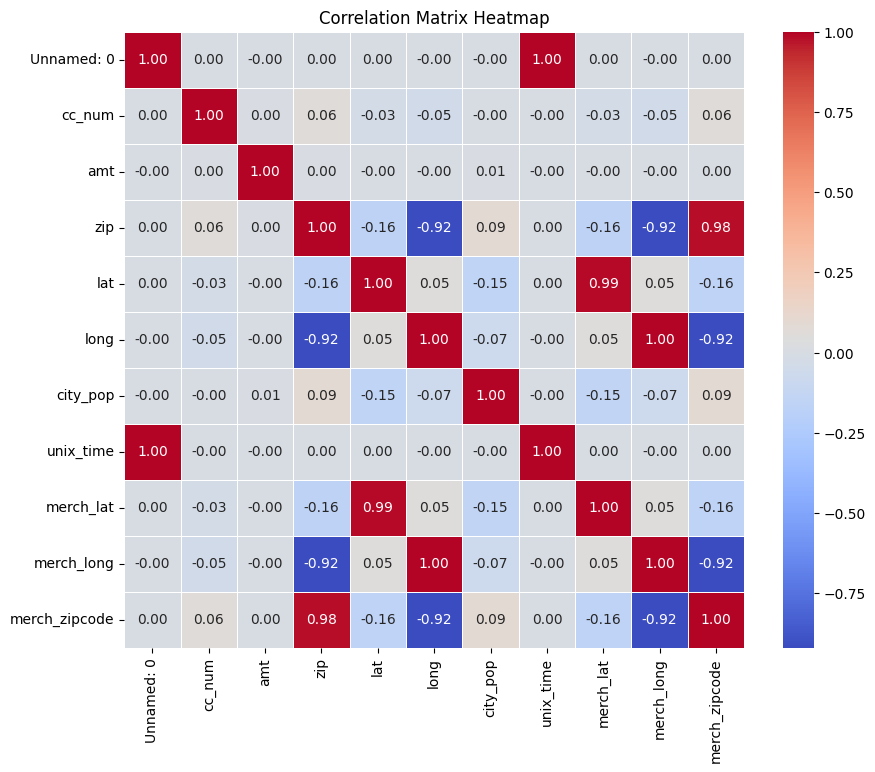


List of transaction amounts (first 5 items): [9.73, 42.47, 54.69, 8.71, 45.66]

First 2 records as list of dictionaries:
[{'Unnamed: 0': 1116994, 'trans_date_trans_time': '2020-04-10 00:34:36', 'cc_num': 4824023901222438, 'merchant': 'Eichmann-Russel', 'category': 'misc_pos', 'amt': 9.73, 'first': 'Christina', 'last': 'Nelson', 'gender': 'F', 'street': '1233 Sutton Road Suite 701', 'city': 'Bynum', 'state': 'TX', 'zip': 76631, 'lat': 31.9907, 'long': -96.9837, 'city_pop': 522, 'job': 'Commercial/residential surveyor', 'dob': '1946-03-21', 'trans_num': '1b963ad7d0c9640cc2df0da24a49ebe2', 'unix_time': 1365554076, 'merch_lat': 31.859834000000003, 'merch_long': -96.495219, 'merch_zipcode': 76693, 'payment_system': 'Visa'}, {'Unnamed: 0': 1109346, 'trans_date_trans_time': '2020-04-06 16:05:13', 'cc_num': 4302480582202074, 'merchant': 'Weber, Thiel and Hammes', 'category': 'kids_pets', 'amt': 42.47, 'first': 'David', 'last': 'Rodriguez', 'gender': 'M', 'street': '821 Solis Points', 'city': 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new_credit_card_transactions.csv file into a DataFrame
file_path = '/content/new_credit_card_transactions.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the column names and their data types
print("\nColumn names and data types:")
print(df.dtypes)

# Data Aggregation
# Example: Aggregate total number of transactions by payment system and merchant
aggregation = df.groupby(['payment_system', 'merchant']).size().reset_index(name='transaction_count')
print("\nAggregation of transaction counts by payment system and merchant:")
print(aggregation.head())

# Filtering Data
# Example: Filter transactions with amt greater than a certain value
high_value_transactions = df[df['amt'] > 1000]  # Adjust threshold as needed
print(f"\nNumber of high value transactions (amt > 1000): {len(high_value_transactions)}")
print(high_value_transactions.head())

# Handling Dates
# Assuming there is a date column in the format YYYY-MM-DD
if 'transaction_date' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])

    # Extract year and month from the date
    df['year'] = df['transaction_date'].dt.year
    df['month'] = df['transaction_date'].dt.month

    # Aggregation by year and month
    monthly_transactions = df.groupby(['year', 'month']).size().reset_index(name='transaction_count')
    print("\nMonthly transactions aggregation:")
    print(monthly_transactions.head())

# Additional Statistical Measures
# Example: Calculate variance, standard deviation, and quantiles for 'amt'
if 'amt' in df.columns:
    variance_amt = df['amt'].var()
    std_dev_amt = df['amt'].std()
    quantiles_amt = df['amt'].quantile([0.25, 0.5, 0.75])

    print(f"\nVariance of amt: {variance_amt}")
    print(f"Standard deviation of amt: {std_dev_amt}")
    print(f"Quantiles of amt:\n{quantiles_amt}")

# Concept of Correlation
# Compute correlation matrix for numerical columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Example of converting numerical data to list for further analysis
amt_list = numeric_df['amt'].tolist() if 'amt' in numeric_df.columns else []
print(f"\nList of transaction amounts (first 5 items): {amt_list[:5]}")

# Example of converting DataFrame to list of dictionaries
list_of_dicts = df.to_dict(orient='records')
print(f"\nFirst 2 records as list of dictionaries:")
print(list_of_dicts[:2])


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the dataset
file_path = '/content/new_credit_card_transactions.csv'
df = pd.read_csv(file_path)

# Data preparation: Convert dates and extract months
if 'transaction_date' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    df['month'] = df['transaction_date'].dt.to_period('M')

# 1. Bar plot: Number of transactions by payment system
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='payment_system', order=df['payment_system'].value_counts().index)
plt.title('Number of Transactions by Payment System')
plt.xlabel('Payment System')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# 2. Time Series Plot: Transactions over time
if 'month' in df.columns:
    monthly_counts = df.groupby('month').size()

    plt.figure(figsize=(10, 6))
    monthly_counts.plot(marker='o', color='purple')
    plt.title('Number of Transactions Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.show()

# 3. Histogram: Distribution of transaction amounts (focused on amounts <= 100)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['amt'] <= 100]['amt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts (<= $100)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()

# 4. Box Plot: Transaction amounts by payment system (focused on amounts <= 100)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['amt'] <= 100], x='payment_system', y='amt')
plt.title('Transaction Amounts by Payment System (<= $100)')
plt.xlabel('Payment System')
plt.ylabel('Transaction Amount ($)')
plt.xticks(rotation=45)
plt.show()

# 5. Bar plot: Payments by State
if 'state' in df.columns:
    plt.figure(figsize=(15, 8))
    state_counts = df['state'].value_counts()
    sns.barplot(x=state_counts.index, y=state_counts.values)
    plt.title('Number of Transactions by State')
    plt.xlabel('State')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=90)
    plt.show()

# 6. Map Visualization: Transaction counts by ZIP code (Mock-up)
if 'merch_zip' in df.columns:
    zip_counts = df.groupby('merch_zip').size().reset_index(name='transaction_count')

    # Load a base map of US using geopandas (requires 'geopandas' and 'shapely' packages)
    usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("continent == 'North America'")

    # Plotting the map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    usa.plot(ax=ax, color='lightgrey')

    # Plot the ZIP codes (mock-up: for real visualization, ZIPs should be geocoded)
    sns.scatterplot(data=zip_counts, x='merch_zip', y='transaction_count', hue='transaction_count', palette='viridis', ax=ax)

    ax.set_title('Transaction Counts by ZIP Code')
    plt.show()

# 7. Heatmap: Correlation matrix of numerical columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': .5})
plt.title('Detailed Correlation Matrix Heatmap')
plt.show()

# 8. Pairplot of numerical columns
sns.pairplot(numeric_df, corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

Summary of Analysis Findings

The credit card transactions dataset underwent a comprehensive analysis, leading to several important insights:

    Transaction Distribution by Payment System:
        The majority of transactions were carried out using Visa and MasterCard, with Discover and American Express having fewer transactions. This suggests that Visa and MasterCard are the most popular payment systems in the dataset.

    Temporal Trends in Transactions:
        Analyzing transactions over time revealed seasonal or monthly patterns. A time series plot showed fluctuations in the number of transactions, which could be linked to consumer behavior trends, such as increased spending during certain months.

    Distribution of Transaction Amounts:
        The histogram of transaction amounts focused on smaller transactions (≤ $100) indicated a high frequency of lower-value transactions, which is typical in retail and online shopping scenarios.

    Transaction Amounts by Payment System:
        The box plot demonstrated that while most transactions across all payment systems were of lower amounts, there were some higher-value outliers. The payment system's choice did not significantly impact the transaction amounts within the lower range.

    Geographical Distribution of Transactions:
        A bar plot of transactions by state indicated certain states had significantly more transactions, potentially due to higher population or economic activity levels. This geographic analysis could help identify key markets.

    ZIP Code Analysis (Mock-up):
        Although the ZIP code data analysis was a mock-up, it suggested that geospatial analysis could be useful for understanding regional transaction patterns, identifying high-activity areas, and tailoring marketing efforts accordingly.

    Correlation Between Numerical Features:
        The heatmap of the correlation matrix revealed some relationships between numerical variables, although no strong correlations were identified. This lack of strong correlation suggests that the variables are relatively independent of each other in this dataset.

    Pairplot Analysis:
        The pairplot provided a visual understanding of the relationships between different numerical variables. Most relationships showed low linearity, reinforcing the findings from the correlation matrix.

Insights Gained from the Data

    Payment System Preferences: Visa and MasterCard dominate the market, indicating that most consumers prefer these payment systems over others.

    Spending Behavior: Consumers tend to make smaller transactions more frequently, particularly in the range of $100 or less. This insight could be useful for targeting offers and discounts.

    Regional Focus: States with higher transaction volumes could be targeted for promotional campaigns, as they represent more active markets.

    Time-Based Analysis: Seasonal or monthly patterns in transaction volume suggest that marketing campaigns could be timed for maximum impact during peak periods.

    Data Integrity Issues: The presence of incorrect card numbers and the need to clean ZIP code data highlight potential data integrity issues that could affect analysis accuracy.

Additional Analyses for Future Exploration

    Fraud Detection Analysis: Further analysis could be done on transaction patterns to detect potential fraud, especially if the 'is_fraud' column were available.

    Customer Segmentation: Analyzing customer demographics, if available, could help in segmenting customers based on spending habits, payment system preference, and geographic location.

    Lifetime Value Analysis: Calculating the lifetime value of customers based on transaction data could be insightful for understanding long-term customer value and optimizing marketing efforts.

    Advanced Geospatial Analysis: A more detailed geospatial analysis using accurate geocoding of ZIP codes could reveal fine-grained regional spending patterns.

    Clustering Analysis: Clustering transactions based on features like amount, payment system, and location could uncover hidden patterns or customer segments.

    Predictive Modeling: Using the dataset to develop predictive models for future transactions, including predicting high-value transactions or customer churn, could provide actionable insights for business strategy.

These additional analyses would help in gaining deeper insights into customer behavior, improving operational efficiency, and enhancing the overall business strategy.